In [1]:
#notebook to be used for cleaning and organizing data
%matplotlib inline 
#can use inline if we prefer

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly as py
import plotly.graph_objs as go

#pull and read rankings
rankings_excel = 'HighSchool_100_Rankings.xlsx'
rankings = pd.read_excel(rankings_excel)
#rankings.head() - test worked

#pull and read team data
team_excel = 'Team_Data.xlsx'
team = pd.read_excel(team_excel)
del team['Hometown']
#team.head() - test worked

In [12]:
data = dict(type = 'choropleth', locations = ['China','Canada','Brazil'], locationmode='country names', colorscale =['Viridis'], z = [10,20,30]


map = go.Figure(data=[data])
py.offline.plot(map)

SyntaxError: invalid syntax (<ipython-input-12-d6cc1022adc0>, line 4)

In [79]:
#split hometown into two columns, rename and add back into rankings
hometown_split = rankings['Hometown'].str.split(', ',expand=True)
rankings['City'] = hometown_split[0]
rankings['State'] = hometown_split[1]
del rankings['Hometown']
rankings.head()

,Year,RSCI,Player Name,Position,College,City,State
0,2018,1,R.J. Barrett,SF,Duke,Montverde,FL
1,2018,2,Cameron Reddish,SG,Duke,Norristown,PA
2,2018,3,Nassir Little,SF,North Carolina,Orlando,FL
3,2018,4,Zion Williamson,PF,Duke,Spartanburg,SC
4,2018,5,Romeo Langford,SG,Indiana,New Albany,IN


In [80]:
#school data counts
schools = rankings.groupby('College')
schools_count = schools['College'].count()
schools_count.sort_values(ascending=False).head()

College
Kentucky          57
Duke              49
Kansas            37
North Carolina    36
UCLA              35
Name: College, dtype: int64

In [81]:
#team percent of year
year = rankings.groupby('Year')
rankings_year = year['Year'].count()
rankings_year

Year
2006     99
2007    100
2008    101
2009     99
2010    100
2011    100
2012    100
2013    101
2014    100
2015    100
2016    101
2017    100
2018    101
Name: Year, dtype: int64

In [82]:
#team count of year
school_year = rankings.groupby('College')['Year'].value_counts()
school_year.sort_values(ascending=False).head()

College         Year
Kentucky        2017    8
North Carolina  2006    6
Kentucky        2013    6
Duke            2017    6
                2011    6
Name: Year, dtype: int64

In [83]:
#percent of recruits that went to a given college in a given year
school_year_percent = (school_year / rankings_year)*100
school_year_percent.head()

College  Year
Akron    2009    1.010101
Alabama  2011    3.000000
         2017    3.000000
         2007    2.000000
         2008    1.980198
Name: Year, dtype: float64

In [84]:
#team percent of total
school_percent = (schools_count / len(rankings))*100
school_percent.sort_values(ascending=False).head()

College
Kentucky          4.377880
Duke              3.763441
Kansas            2.841782
North Carolina    2.764977
UCLA              2.688172
Name: College, dtype: float64

In [85]:
#school state count - shows how many were taken by each school per state
school_state = rankings.groupby('College')['State'].value_counts()
school_state.head()

College  State
Akron    PA        1
Alabama  AL       10
         GA        4
         FL        1
         KS        1
Name: State, dtype: int64

In [86]:
#team state percent of same team total
school_state_percent = (school_state / schools_count)*100
school_state_percent.head()
#to call a specific team use ['Team Name']


College  State
Akron    PA       100.000000
Alabama  AL        52.631579
         GA        21.052632
         FL         5.263158
         KS         5.263158
dtype: float64

In [87]:
#positions count
position = rankings.groupby('Position')
position_count = position['Position'].count()
position_count.sort_values(ascending=False)

Position
PF    306
SG    301
SF    265
PG    227
C     188
CG     10
CF      5
Name: Position, dtype: int64

In [88]:
#position percent of total
position_percent = (position_count / len(rankings))*100
position_percent.sort_values(ascending=False)

Position
PF    23.502304
SG    23.118280
SF    20.353303
PG    17.434716
C     14.439324
CG     0.768049
CF     0.384025
Name: Position, dtype: float64

In [89]:
#position count of year
position_count_year = rankings.groupby('Position')['Year'].value_counts()
position_count_year.head()

Position  Year
C         2006    19
          2008    19
          2012    17
          2015    17
          2017    17
Name: Year, dtype: int64

In [90]:
#percentage of position in a given year
position_percent_year = (position_count_year/rankings_year)*100
position_percent_year.head()

Position  Year
C         2006    19.191919
          2008    18.811881
          2012    17.000000
          2015    17.000000
          2017    17.000000
Name: Year, dtype: float64

In [91]:
#position by state - do certain states produce more of the same position?
position_state = rankings.groupby('State')['Position'].value_counts()
position_state.head()

State  Position
AL     SG          9
       C           5
       PF          4
       PG          3
       SF          2
Name: Position, dtype: int64

In [92]:
#state count
state = rankings.groupby('State')
state_count = state['State'].count()
state_count.sort_values(ascending=False).head()

State
CA    139
TX     94
GA     79
FL     72
VA     70
Name: State, dtype: int64

In [93]:
#state percent of total
state_percent = (state_count / len(rankings))*100
state_percent.sort_values(ascending=False).head()

State
CA    10.675883
TX     7.219662
GA     6.067588
FL     5.529954
VA     5.376344
Name: State, dtype: float64

In [94]:
#count by state in a given year
state_year = rankings.groupby('Year')['State'].value_counts()
state_year.head()

Year  State
2006  CA       14
      TX        8
      NJ        7
      TN        7
      VA        6
Name: State, dtype: int64

In [95]:
#state percent in a given year
state_percent_year = state_year / rankings_year
state_percent_year.head()

Year  State
2006  CA       0.141414
      TX       0.080808
      NJ       0.070707
      TN       0.070707
      VA       0.060606
dtype: float64

In [96]:
#state count by team
state_count_team = rankings.groupby('State')['College'].value_counts()
state_count_team.head()

State  College      
AL     Alabama          10
       Indiana           3
       Kentucky          2
       Connecticut       1
       Florida State     1
Name: College, dtype: int64

In [97]:
#city count
city = rankings.groupby('City')
city_count = city['City'].count()
city_count.sort_values(ascending=False).head()

City
Chicago            30
Mouth of Wilson    24
Memphis            19
Indianapolis       18
Henderson          17
Name: City, dtype: int64

In [98]:
#position by school - do schools target particular positions in the top 100 more than others?
position_college = rankings.groupby('College')['Position'].value_counts()
position_college.head()


College  Position
Akron    C           1
Alabama  SG          8
         SF          4
         PG          3
         PF          2
Name: Position, dtype: int64

In [99]:
#position by school by state - do schools target particular positions from certain states in the top 100 more than others?
position_college_state = rankings.groupby(['College','Position'])['State'].value_counts()
position_college_state.head()

College  Position  State
Akron    C         PA       1
Alabama  C         AL       1
         CG        LA       1
         PF        AL       2
         PG        AL       2
Name: State, dtype: int64

In [100]:
#team data, reprinting for ease
team.head()

,Player,Team,Year,Class,Pos,RSCI Top 100,Pts.,Winner
0,Jay Williams,Duke,2001,SO,G,3.0,21.6,Yes
1,Shane Battier,Duke,2001,SR,F,NaN,19.9,Yes
2,Mike Dunleavy,Duke,2001,SO,F,26.0,12.6,Yes
3,Nate James,Duke,2001,SR,F,NaN,12.3,Yes
4,Carlos Boozer,Duke,2001,SO,C,8.0,13.3,Yes


In [101]:
#Team Data/Class makeup by year
year_team_grade = team.groupby(['Year','Team'])['Class'].value_counts()
year_team_grade.head()

Year  Team     Class
2001  Arizona  SO       3
               SR       3
               JR       2
      Duke     SO       4
               SR       2
Name: Class, dtype: int64

In [102]:
#total grades in tournament
grade = team.groupby('Class').count()
grade

#team upperclassmen count by year
#team ranking in top 100 total

,Player,Team,Year,Pos,RSCI Top 100,Pts.,Winner
Class,,,,,,,
FR,119,119,119,119,84,119,119
JR,182,182,182,182,107,182,182
SO,151,151,151,151,101,151,151
SR,157,157,157,157,62,157,157


In [103]:
#total number of players in the tourney over the years of our data
print(f'The Database has {len(team)} players')

The Database has 609 players


In [104]:
#count of grade/class in each year
grade_year = team.groupby('Year')['Class'].value_counts()
grade_year.head()

Year  Class
2001  SO       11
      SR       11
      JR        7
      FR        3
2002  JR       13
Name: Class, dtype: int64

In [105]:
#team occurrences final four
team_finalfour = team.groupby('Team').count()/8
team_finalfour.head()

,Player,Year,Class,Pos,RSCI Top 100,Pts.,Winner
Team,,,,,,,
Arizona,1.0,1.0,1.0,1.0,0.625,1.0,1.0
Auburn,1.0,1.0,1.0,1.0,0.375,1.0,1.0
Butler,2.0,2.0,2.0,2.0,0.000,2.0,2.0
Duke,4.0,4.0,4.0,4.0,3.375,4.0,4.0
Florida,3.0,3.0,3.0,3.0,1.750,3.0,3.0


In [106]:
year_final_four_top100 = team.groupby(['Year'])['RSCI Top 100'].count()
year_final_four_top100

Year
2001    17
2002    16
2003    19
2004    20
2005    25
2006    12
2007    18
2008    26
2009    24
2010    18
2011    14
2012    21
2013    14
2014    19
2015    22
2016    23
2017    17
2018    15
2019    14
Name: RSCI Top 100, dtype: int64

In [107]:
year_winner_top100_count = team.loc[team["Winner"] == "Yes", :]
year_winner_top100 = year_winner_top100_count.groupby(['Year'])['RSCI Top 100'].count()
year_winner_top100


Year
2001    5
2002    4
2003    5
2004    7
2005    7
2006    4
2007    5
2008    8
2009    8
2010    7
2011    6
2012    8
2013    6
2014    4
2015    8
2016    7
2017    8
2018    5
2019    5
Name: RSCI Top 100, dtype: int64

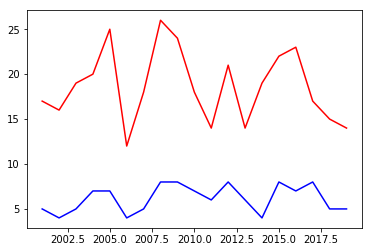

In [108]:
years = year_winner_top100.keys()
top100winner = plt.plot(years, year_winner_top100, color='blue')
top100finalfour = plt.plot(years, year_final_four_top100, color='red')
plt.show()



In [109]:
percentage_of_top100_in_final_four = year_winner_top100/year_final_four_top100*100
#percentage_of_top100_in_final_four
round(percentage_of_top100_in_final_four,2)

Year
2001    29.41
2002    25.00
2003    26.32
2004    35.00
2005    28.00
2006    33.33
2007    27.78
2008    30.77
2009    33.33
2010    38.89
2011    42.86
2012    38.10
2013    42.86
2014    21.05
2015    36.36
2016    30.43
2017    47.06
2018    33.33
2019    35.71
Name: RSCI Top 100, dtype: float64

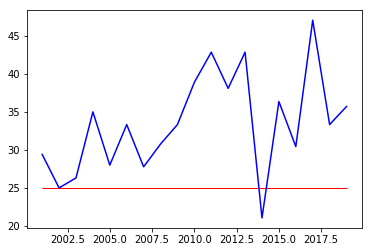

In [119]:
years = year_winner_top100.keys()
percentage_top100winners_in_final_four = plt.plot(years, percentage_of_top100_in_final_four, color='blue')
plt.hlines(y=25, xmin=2001, xmax=2019, linewidth=1, color='r')
plt.show()

In [111]:
#top 100 players on teams in a given year
year_team_ranking_count = team.groupby(['Year','Team'])['RSCI Top 100'].count()
year_team_ranking_count

Year  Team          
2001  Arizona           5
      Duke              5
      Maryland          3
      Michigan State    4
2002  Indiana           4
      Kansas            7
      Maryland          4
      Oklahoma          1
2003  Kansas            5
      Marquette         4
      Syracuse          5
      Texas             5
2004  Duke              7
      Georgia Tech      5
      Oklahoma State    1
      Uconn             7
2005  Illinios          6
      Louisville        5
      Michigan State    7
      North Carolina    7
2006  Florida           4
      George Mason      0
      LSU               3
      UCLA              5
2007  Florida           5
      Georgetown        3
      Ohio State        6
      UCLA              4
2008  Kansas            8
      Memphis           6
                       ..
2012  Louisville        4
      Ohio State        4
2013  Louisville        6
      Michigan          3
      Syracuse          5
      Wichita State     0
2014  Florida    

In [112]:
#top 100 players recruited by all teams over the years of our data
team_ranking_count_total = team.groupby('Team')['RSCI Top 100'].count()
team_ranking_count_total.sort_values(ascending=False)

Team
North Carolina    38
Michigan State    34
Kansas            31
Kentucky          31
Duke              27
Syracuse          18
Villanova         16
UConn             16
Louisville        15
Florida           14
UCLA              14
Ohio State        10
Maryland           7
Uconn              7
Illinios           6
Memphis            6
Texas              5
Georgia Tech       5
Virginia           5
Arizona            5
Indiana            4
Gonzaga            4
Marquette          4
Wisconsin          4
Michigan           4
LSU                3
Michigan           3
Oregon             3
Georgetown         3
West Virginia      3
Auburn             3
South Carolina     2
Oklahoma           1
Oklahoma State     1
Texas Tech         1
VCU                1
Loyola Chicago     0
Wichita State      0
George Mason       0
Butler             0
Name: RSCI Top 100, dtype: int64

In [113]:
#top 100 players (their rankings) on teams in a given year
year_team_ranking_list = team.groupby(['Year','Team'])['RSCI Top 100'].count()
year_team_ranking_list

Year  Team          
2001  Arizona           5
      Duke              5
      Maryland          3
      Michigan State    4
2002  Indiana           4
      Kansas            7
      Maryland          4
      Oklahoma          1
2003  Kansas            5
      Marquette         4
      Syracuse          5
      Texas             5
2004  Duke              7
      Georgia Tech      5
      Oklahoma State    1
      Uconn             7
2005  Illinios          6
      Louisville        5
      Michigan State    7
      North Carolina    7
2006  Florida           4
      George Mason      0
      LSU               3
      UCLA              5
2007  Florida           5
      Georgetown        3
      Ohio State        6
      UCLA              4
2008  Kansas            8
      Memphis           6
                       ..
2012  Louisville        4
      Ohio State        4
2013  Louisville        6
      Michigan          3
      Syracuse          5
      Wichita State     0
2014  Florida    

In [114]:
#team occurrences championships - a way to show just Natl. Title winners would be to A) Remove all 'no' from excel or
    # ask nate/TA how we can call just the 'yes' selection
year_team_ranking_count = team.groupby(['Year','Team'])['Winner'].value_counts()
year_team_ranking_count

Year  Team            Winner
2001  Arizona         No        8
      Duke            Yes       8
      Maryland        No        8
      Michigan State  No        8
2002  Indiana         No        8
      Kansas          No        8
      Maryland        Yes       7
      Oklahoma        No        8
2003  Kansas          No        8
      Marquette       No        8
      Syracuse        Yes       8
      Texas           No        8
2004  Duke            No        8
      Georgia Tech    No        8
      Oklahoma State  No        8
      Uconn           Yes       8
2005  Illinios        No        8
      Louisville      No        8
      Michigan State  No        8
      North Carolina  Yes       8
2006  Florida         Yes       8
      George Mason    No        8
      LSU             No        8
      UCLA            No        8
2007  Florida         Yes       8
      Georgetown      No        8
      Ohio State      No        8
      UCLA            No        8
2008  Kansas       